<div style="background-color:	#103060; text-align:center; vertical-align: middle; padding:40px 0; margin-top:30px">
<h1 style="color:white">Scraping_project</h1>
<b style="color:white">Rogier Gernaat</b>
    </div>

<a name='start'></a>

<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Inladen van modules en library's</strong>
</div>


In [ ]:
# !pip install mysql-connector-python
# pip install mysql
# !pip install matplotlib
# !pip install pandas

In [4]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
import mysql.connector
import pandas as pd

<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Inladen van de inlog-gegevens via .env</strong>
</div>




In [30]:
load_dotenv()
db_host = os.getenv('DB_HOST')
db_port = os.getenv('DB_PORT', 3306)
db_user = os.getenv('DB_USER')
db_password = os.getenv('DB_PASSWORD')
db_name = os.getenv('DB_NAME')
db_ssl_ca = os.getenv('DB_SSL_CA')

<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Bekijken Databases</strong>
</div>




In [31]:
# Load environment variables from .env file
load_dotenv()

# Establish the connection to Azure MySQL
conn = mysql.connector.connect(
    host=db_host,
    port=db_port,
    user=db_user,
    password=db_password,
    database=db_name,
    ssl_ca=db_ssl_ca  # Ensure this matches the certificate you have
)


query = "SHOW Databases"
df_IZ = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Display a sample of the data
df_IZ.head()


C:\Users\rogie\AppData\Local\Temp\ipykernel_2096\1781164313.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_IZ = pd.read_sql(query, conn)


,Database
0,information_schema
1,mysql
2,performance_schema
3,scraping_project
4,sys


<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Bekijken Tabellen</strong>
</div>




In [27]:
# Establish the connection to Azure MySQL
conn = mysql.connector.connect(
    host=db_host,
    user=db_user,
    password=db_password,
    database=db_name,
    ssl_ca=db_ssl_ca  # Ensure this matches the certificate you have
)

# Example: Retrieve data from the 'activiteiten' table
query = "SHOW Tables"
df_IZ = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Display a sample of the data
df_IZ


C:\Users\rogie\AppData\Local\Temp\ipykernel_2096\2316816237.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_IZ = pd.read_sql(query, conn)


,Tables_in_scraping_project
0,activiteiten
1,activiteiten_nlzve
2,activiteiten_scheidingpunt
3,activiteiten_uit
4,activiteiten_zma
5,activiteiten_zte
6,apps_ggd
7,evie_data
8,thuisarts
9,vierstroom_nieuws


<a name='2.0'></a>

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>IZ-InDeWijk </strong></h2>
</div>
Scrapen van de evenementen pagina's van Inzet indewijk

https://www.inzet-indewijk.nl/evenementen/1

In [ ]:
# Establish the connection to Azure MySQL
conn = mysql.connector.connect(
    host=db_host,
    user=db_user,
    password=db_password,
    database=db_name,
    ssl_ca=db_ssl_ca  
)

query = "SELECT * FROM activiteiten"
df_IZ = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Display a sample of the data
df_IZ.head()


C:\Users\rogie\AppData\Local\Temp\ipykernel_2096\2010587604.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_IZ = pd.read_sql(query, conn)


,id,Titel,Link,Datum_numeriek,Datum_text,Beschrijving,Starttijd,Eindtijd,Locatie,URL_afbeelding,Extra_beschrijving
0,1,Informatiebijeenkomst huisvesting,https://www.inzet-indewijk.nl/informatiebijeen...,2025-01-07,"dinsdag, 7 januari 2025",Stel al je vragen over huisvesting,0 days 10:00:00,0 days 11:30:00,"inZet Buytenwegh & De Leyens, Teldersrode 25",https://cuatro.sim-cdn.nl/inzetindewijk/upload...,Heb jij vragen over huisvesting? Kom dan naar ...
1,2,Training assertiviteit voor volwassenen,https://www.inzet-indewijk.nl/training-asserti...,2025-04-07,"maandag, 7 april 2025",Leer voor jezelf opkomen,0 days 18:30:00,0 days 21:00:00,"inZet Buytenwegh & De Leyens, Teldersrode 25",https://cuatro.sim-cdn.nl/inzetindewijk/upload...,Durf je niet te zeggen wat je werkelijk vindt?...
2,3,Ouderbijeenkomst over kinderen en schermgebruik,https://www.inzet-indewijk.nl/ouderbijeenkomst...,2025-01-08,"woensdag, 8 januari 2025",in samenwerking met de mediaconsulent van Bibl...,0 days 09:30:00,0 days 11:30:00,"Forum Zoetermeer, Stadhuisplein 1",https://cuatro.sim-cdn.nl/inzetindewijk/upload...,Bibliotheek Zoetermeer en inZet organiseren sa...


<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Aantal activiteiten per locatie</strong>
</div>




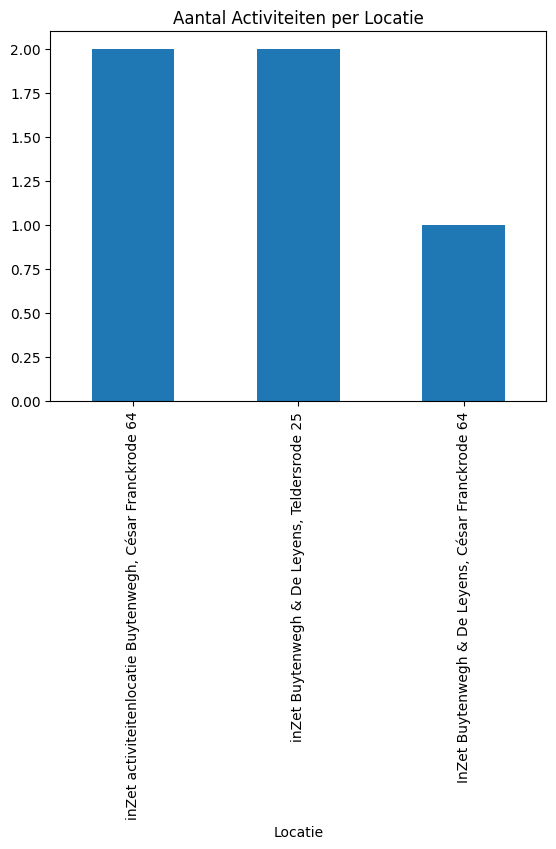

In [19]:
# Voorbeeld: aantal activiteiten per locatie
df_IZ['Locatie'].value_counts().plot(kind='bar')
plt.title('Aantal Activiteiten per Locatie')
plt.show()


<a name='2.0'></a>

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>ZoetermeerTegenEenzaamheid </strong></h2>
</div>
Scrapen van de nieuws pagina's van het laatste nieuws, intervieuws en initatieven

https://zoetermeertegeneenzaamheid.nl/nieuws/

In [26]:
# Establish the connection to Azure MySQL
conn = mysql.connector.connect(
    host=db_host,
    user=db_user,
    password=db_password,
    database=db_name,
    ssl_ca=db_ssl_ca  
)

query = "SELECT * FROM activiteiten_zte"
df_zte = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Display a sample of the data
df_zte


C:\Users\rogie\AppData\Local\Temp\ipykernel_14524\1383731720.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_zte = pd.read_sql(query, conn)


,id,Titel,Link,Url_header_afbeelding,Datum_numeriek,Datum_text,Url_afbeelding,Beschrijving
0,1,Welke straat is de liefste van Zoetermeer?,https://zoetermeertegeneenzaamheid.nl/nieuws/l...,https://zoetermeertegeneenzaamheid.nl/media/fi...,2024-11-20,woensdag 20 november 2024,https://zoetermeertegeneenzaamheid.nl/media/fi...,Lief en Leed Zoetermeer startte in 2020 met de...
1,2,Activiteit: Summer Sing Alongs,https://zoetermeertegeneenzaamheid.nl/nieuws/a...,https://zoetermeertegeneenzaamheid.nl/media/fi...,2024-07-29,maandag 29 juli 2024,https://zoetermeertegeneenzaamheid.nl/media/fi...,"De zomer is niet voor iedereen een leuke tijd,..."
2,3,Community aan het woord: Sociale sportschool,https://zoetermeertegeneenzaamheid.nl/nieuws/c...,https://zoetermeertegeneenzaamheid.nl/media/fi...,2024-08-26,maandag 26 augustus 2024,https://zoetermeertegeneenzaamheid.nl/media/fi...,De Sociale Sportschool brengt senioren en jong...
3,4,Community aan het woord: Gil Lieveld,https://zoetermeertegeneenzaamheid.nl/nieuws/c...,https://zoetermeertegeneenzaamheid.nl/media/fi...,2024-11-04,maandag 4 november 2024,https://zoetermeertegeneenzaamheid.nl/media/fi...,Mijn naam is Gil Lieveld en ik ben een onderne...
4,5,Interview: Karaokeavond voor Hindoestaanse gem...,https://zoetermeertegeneenzaamheid.nl/nieuws/i...,https://zoetermeertegeneenzaamheid.nl/media/fi...,2024-07-15,maandag 15 juli 2024,https://zoetermeertegeneenzaamheid.nl/media/fi...,Tijdens de karaokeavond kun je genieten van ou...
5,6,Terugblik Week tegen Eenzaamheid 2024,https://zoetermeertegeneenzaamheid.nl/nieuws/w...,https://zoetermeertegeneenzaamheid.nl/media/fi...,2024-10-10,donderdag 10 oktober 2024,https://zoetermeertegeneenzaamheid.nl/media/fi...,De Zoetermeerse Community tegen Eenzaamheid or...
6,7,Community aan het woord: Love Your Mind,https://zoetermeertegeneenzaamheid.nl/nieuws/c...,https://zoetermeertegeneenzaamheid.nl/media/fi...,2024-11-14,donderdag 14 november 2024,https://zoetermeertegeneenzaamheid.nl/media/fi...,Wij zijn Radha Nanhoe en Steven van der Knaap....
7,8,Samen wandelen in het groen zorgt voor verbind...,https://zoetermeertegeneenzaamheid.nl/nieuws/s...,https://zoetermeertegeneenzaamheid.nl/media/fi...,2024-06-17,maandag 17 juni 2024,https://zoetermeertegeneenzaamheid.nl/media/fi...,Samen wandelen is gezelliger dan alleen! Daaro...
8,9,Netwerkbijeenkomst: Eten en Ontmoeten in Buyte...,https://zoetermeertegeneenzaamheid.nl/nieuws/n...,https://zoetermeertegeneenzaamheid.nl/media/fi...,2024-06-17,maandag 17 juni 2024,https://zoetermeertegeneenzaamheid.nl/media/fi...,"Gado gado, gevulde wijnbladeren, pindasaus, ri..."
9,10,interview: Een betekenisvolle ontmoeting met Vera,https://zoetermeertegeneenzaamheid.nl/nieuws/i...,https://zoetermeertegeneenzaamheid.nl/media/fi...,2024-04-23,dinsdag 23 april 2024,https://zoetermeertegeneenzaamheid.nl/media/fi...,Marije Arnouts (Senior Programmaregisseur) is ...


<a name='2.0'></a>

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>Zoetermeeractief</strong></h2>
</div>

Scrapen van het laatste nieuws, initiatieven of activiteiten

https://zoetermeeractief.nl/agenda/complete-agenda

In [29]:
# Load environment variables from .env file
load_dotenv()

# Establish the connection to Azure MySQL
conn = mysql.connector.connect(
    host=db_host,
    user=db_user,
    password=db_password,
    database=db_name,
    ssl_ca=db_ssl_ca  
)

query = "SELECT * FROM activiteiten_zma"
df_zma = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Display a sample of the data
df_zma


C:\Users\rogie\AppData\Local\Temp\ipykernel_2096\2054162802.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_zma = pd.read_sql(query, conn)


,id,Titel,Link,Beschrijving,Startdatum,Url_header_afbeelding,Extra_beschrijving,Url_afbeelding,Categorie_1,Categorie_2,Categorie_3,Categorie_4


<a name='2.0'></a>

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>UITagendazoetermeer</strong></h2>
</div>

Scrapen van het laatste nieuws, initiatieven of activiteiten. Deze website is gelinkt aan zoetermeerisdeplek.nl

https://www.uitagendazoetermeer.nl/uitagenda

In [30]:
# Load environment variables from .env file
load_dotenv()

# Establish the connection to Azure MySQL
conn = mysql.connector.connect(
    host=db_host,
    user=db_user,
    password=db_password,
    database=db_name,
    ssl_ca=db_ssl_ca  # Ensure this matches the certificate you have
)

# Example: Retrieve data from the 'activiteiten' table
query = "SELECT * FROM activiteiten_uit"
df_UIT = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Display a sample of the data
df_UIT

C:\Users\rogie\AppData\Local\Temp\ipykernel_14524\3292011690.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_UIT = pd.read_sql(query, conn)


,id,Titel,Beschrijving,Datum,Starttijd,Eindtijd,Prijs,Straat,Postcode,Naam,Email,Bedrijf_Website,Url_plaatje
0,1,"Saturday Night Fever - Buddy Vedder, Esmée Dek...","Tony Manero, een jonge man uit een arm immigra...",Dinsdag 17 december 2024,20.00,22.30 uur,None,Theaterplein 10,2711 EK Zoetermeer,,servicebalie@stadstheater.nl,https://stadstheater.nl,https://assets.plaece.nl/thumb/QDKcAcn9KCByufh...
1,2,Op de koffie bij Franx,Speciaal voor 65+’ers in Zoetermeer organiseer...,Woensdag 18 december 2024,11.00,12.30 uur,Gratis,Vlamingstraat 1,2712VJ Zoetermeer,kunstgarage Franx,info@kunstgaragefranx.nl,http://www.kunstgaragefranx.nl,https://assets.plaece.nl/thumb/ack9yFmOEqI7DSO...
2,3,Kerstshow Intratuin,Beleef de magie van Kerst bij de Intratuin Zoe...,Dagelijks t/m 24 december 2024,09.30,18.00 uur,Gratis,2716 NK Zoetermeer,None,Voorweg 192,None,None,https://assets.plaece.nl/thumb/4zE4p__D5_EVChR...
3,4,Pater Moeskroen - Kerst maar dan nèt even anders,Ben jij ook zo klaar met die verplichte nummer...,Dinsdag 17 december 2024,om 20.30 uur,None,None,Theaterplein 10,2711 EK Zoetermeer,,servicebalie@stadstheater.nl,https://stadstheater.nl,https://assets.plaece.nl/thumb/-hwldWkaMqslA_A...
4,5,Kerstmarkt De Driesprong,Stap binnen in een winterwonderland en laat je...,Dagelijks t/m 24 december 2024,None,None,None,2718 PR Zoetermeer,None,Berkelseweg 5,None,None,https://assets.plaece.nl/thumb/wrT4Gfq8FPFISvC...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,156,Crazy Pianos (reprise) - 25 jaar jubileumshow,25 jaar Crazy Pianos! Dat vraagt om een feeste...,Dagelijks vanaf 30 mei 2025,om 20.00 uur,None,None,Theaterplein 10,2711 EK Zoetermeer,,servicebalie@stadstheater.nl,https://stadstheater.nl,https://assets.plaece.nl/thumb/ow48aSRpATWj-XR...
154,157,Stadstheater Overdag: Catalijne - OFF TO HOLLY...,Catalijne (winnares Concours de la Chanson Lie...,Zondag 25 mei 2025,om 14.00 uur,None,None,Theaterplein 10,2711 EK Zoetermeer,,servicebalie@stadstheater.nl,https://stadstheater.nl,https://assets.plaece.nl/thumb/dDGociHWXNYjoR_...
155,158,Christel de Laat - En door!?,En door!? was het levensmotto van Christel. Ni...,Woensdag 28 mei 2025,20.00,21.45 uur,None,Theaterplein 10,2711 EK Zoetermeer,,servicebalie@stadstheater.nl,https://stadstheater.nl,https://assets.plaece.nl/thumb/WZ0cItq0oDKcfEC...
156,159,Johan Goossens - Het Volle Leven,Eigenlijk zou je iedere dag volmondig JA! moet...,Dagelijks vanaf 19 april 2025,om 20.30 uur,None,None,Theaterplein 10,2711 EK Zoetermeer,,servicebalie@stadstheater.nl,https://stadstheater.nl,https://assets.plaece.nl/thumb/_5Au5FFjPB5njOq...


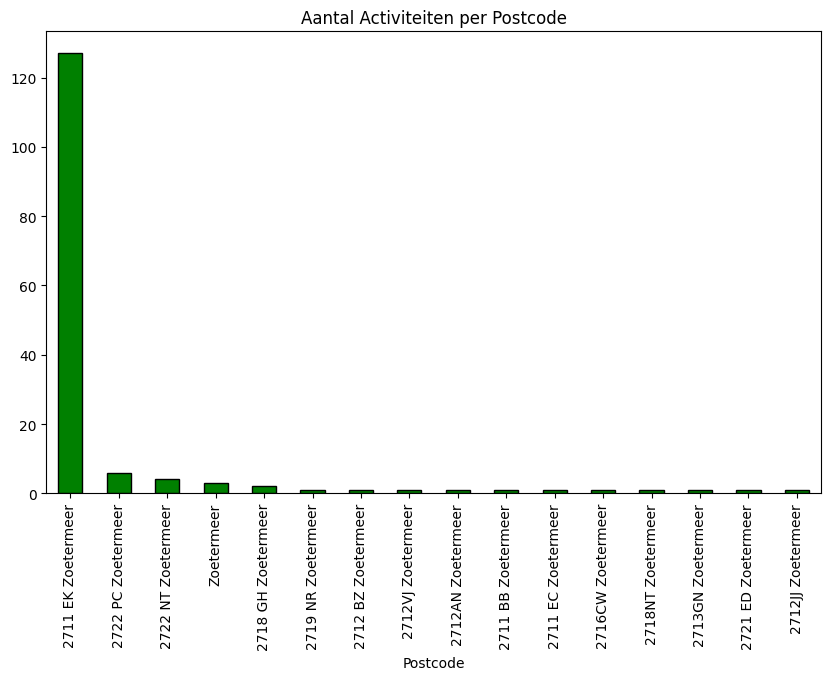

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
df_UIT['Postcode'].value_counts().plot(kind='bar',edgecolor='black',color = "green",ax=ax)
plt.title('Aantal Activiteiten per Postcode')
plt.show()

<Axes: xlabel='Prijs'>

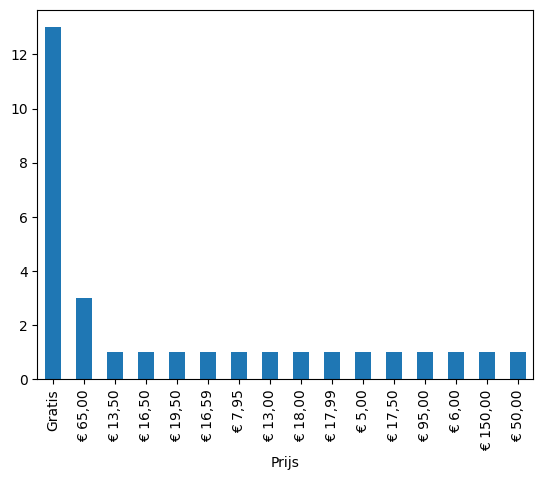

In [32]:
df_UIT['Prijs'].value_counts().plot(kind='bar')

In [35]:
totaal_activiteiten = len(df_UIT) + len(df_zma) + len(df_zte) + len(df_IZ)
totaal_activiteiten


317

<a name='2.0'></a>

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>GGD Appstore</strong></h2>
</div>

Scrapen van alle apps van de pagina

https://ggdappstore.nl/Appstore/Homepage/Sessie,Medewerker,Button

In [42]:
# Load environment variables from .env file
load_dotenv()

# Establish the connection to Azure MySQL
conn = mysql.connector.connect(
    host=db_host,
    user=db_user,
    password=db_password,
    database=db_name,
    ssl_ca=db_ssl_ca  # Ensure this matches the certificate you have
)

# Example: Retrieve data from the 'activiteiten' table
query = "SELECT * FROM apps_ggd"
ggd_apps = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Display a sample of the data
ggd_apps


C:\Users\rogie\AppData\Local\Temp\ipykernel_14524\2651776821.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ggd_apps = pd.read_sql(query, conn)


,id,App_naam,App_rating,Beschrijving_kort,Beschrijving_lang,Dagelijks_Functioneren,Kwaliteit_van_Leven,Lichaamsfuncties,Meedoen,Mentaal_Welbevinden,Zingeving,Android_link,iOS_link,Desktop_link
0,1,S@men Beter Thuis,5.0,Samen Beter Thuis biedt praktische ondersteuni...,S@men Beter Thuis biedt praktische ondersteuni...,1,0,0,1,0,0,None,None,http://www.samenbeterthuis.nl
1,2,Care-Free,5.0,Een app over kindermishandeling en hoe kindere...,Care-Free is een app over kindermishandeling v...,1,1,1,1,1,1,https://play.google.com/store/apps/details?id=...,https://itunes.apple.com/nl/app/care-free/id11...,None
2,3,anticonceptievoorjou.nl,5.0,Deze website is een hulpmiddel bij het kiezen ...,Deze website is een hulpmiddel bij het kiezen ...,0,0,0,1,0,0,None,None,https://www.anticonceptievoorjou.nl/
3,4,Villa Pinedo,5.0,Villa Pinedo is een app voor kinderen met gesc...,Villa Pinedo is de plek waar kinderen met gesc...,0,0,0,0,1,1,https://play.google.com/store/apps/details?id=...,https://apps.apple.com/nl/app/villa-pinedo-bud...,https://www.villapinedo.nl/
4,5,OOPOEH,5.0,"Met behulp van de informatie, die de website w...",Stichting OOPOEH – Opa's en Oma's Passen Op Ee...,0,0,1,1,0,1,None,None,https://www.oopoeh.nl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,111,DGT Onderweg,5.0,DGT Onderweg is een app voor zowel cliënten al...,De app geeft informatie over DGT en borderline...,0,0,0,0,1,0,https://play.google.com/store/apps/details?id=...,https://itunes.apple.com/nl/app/dgt-onderweg/i...,https://www.dialexisadvies.nl/
111,112,Ik fiets,4.5,"De ""Ik fiets"" app is een app om je te stimuler...",Ik fiets is een gratis app die je helpt om sne...,0,0,1,1,0,0,https://play.google.com/store/apps/details?id=...,https://apps.apple.com/nl/app/ik-fiets/id14766...,https://www.ikfiets.nl/
112,113,mindmasters.nl,5.0,Informatieve website voor jongeren met (vragen...,Website voor jongeren van 14 t/m 18 jaar op he...,0,0,0,0,1,0,None,None,https://www.mindmasters.nl/
113,114,Happify,4.5,Happify is een Engelstalige app die je door da...,In de app Happify kiest de gebruiker persoonli...,0,1,0,0,1,1,https://play.google.com/store/apps/details?id=...,https://apps.apple.com/nl/app/happify-for-stre...,https://www.happify.com/


<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Kijken of er dubbele apps tussen staan</strong>
</div>



In [44]:
alle_apps = ggd_apps['App_naam'].unique()
len(alle_apps)


115

<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Wat is de gemiddelde rating, en verdeling van ratings</strong>
</div>



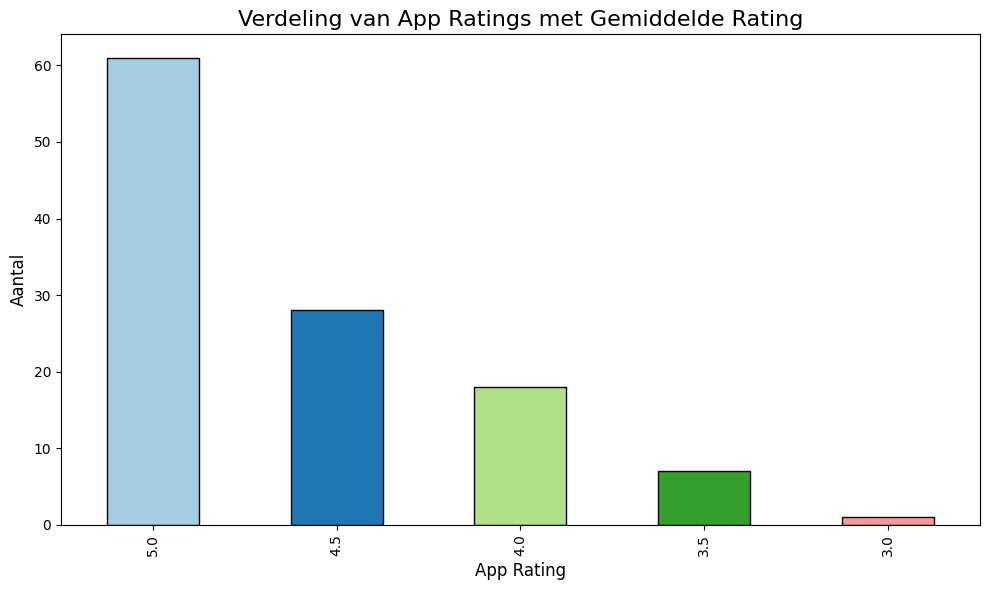

In [46]:
import matplotlib.pyplot as plt

rating_counts = ggd_apps['App_rating'].value_counts().sort_index(ascending=False)

plt.figure(figsize=(10, 6))
bars = rating_counts.plot(kind='bar', color=plt.cm.Paired.colors, edgecolor='black')

plt.title('Verdeling van App Ratings met Gemiddelde Rating', fontsize=16)
plt.xlabel('App Rating', fontsize=12)
plt.ylabel('Aantal', fontsize=12)

# Toon de grafiek
plt.tight_layout()
plt.show()



<a name='2.0'></a>

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>Thuisarts.nl</strong></h2>
</div>

Scrapen van alle onderwerpen en de relevante links, hierbij leek het me meer efficient om de links te weergeven naar de benodigde onderwerpen ipv 10 links scrapen per onderwerp sinds deze mooie pagina's al goed zijn gestructureerd met benodigde informatie

https://www.thuisarts.nl/overzicht/onderwerpen

In [49]:
# Load environment variables from .env file
load_dotenv()

# Establish the connection to Azure MySQL
conn = mysql.connector.connect(
    host=db_host,
    user=db_user,
    password=db_password,
    database=db_name,
    ssl_ca=db_ssl_ca  # Ensure this matches the certificate you have
)

# Example: Retrieve data from the 'activiteiten' table
query = "SELECT * FROM thuisarts"
thuisarts = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Display a sample of the data
thuisarts


C:\Users\rogie\AppData\Local\Temp\ipykernel_14524\2794955213.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  thuisarts = pd.read_sql(query, conn)


,id,Onderwerp,Link_onderwerp,Samenvatting,Situatie_Titel,Situatie_Link
0,1,Aambeien,https://www.thuisarts.nl/aambeien,Een aambei is een bobbeltje aan de binnenkant ...,Ik heb aambeien,https://www.thuisarts.nl/aambeien/ik-heb-aambeien
1,2,Aambeien,https://www.thuisarts.nl/aambeien,Een aambei is een bobbeltje aan de binnenkant ...,Er komt bloed uit mijn anus (poepgat),https://www.thuisarts.nl/bloed-uit-anus/er-kom...
2,3,Aambeien,https://www.thuisarts.nl/aambeien,Een aambei is een bobbeltje aan de binnenkant ...,Ik wil veel vezels eten,https://www.thuisarts.nl/verstopping/ik-wil-ve...
3,4,Acne,https://www.thuisarts.nl/acne,Vanaf de puberteit kun je puistjes krijgen. Di...,Ik heb puistjes (acne). Wat kan ik doen?,https://www.thuisarts.nl/acne/ik-heb-puistjes-...
4,5,Acne,https://www.thuisarts.nl/acne,Vanaf de puberteit kun je puistjes krijgen. Di...,Ik heb acne en krijg medicijnen van de huisarts,https://www.thuisarts.nl/acne/ik-heb-acne-en-k...
...,...,...,...,...,...,...
2186,2199,Angst,https://www.thuisarts.nl/angst,Door problemen kun je vaak bang zijn. Bijvoorb...,Ik heb een paniekstoornis,https://www.thuisarts.nl/paniekaanvallen/ik-he...
2187,2200,Angst,https://www.thuisarts.nl/angst,Door problemen kun je vaak bang zijn. Bijvoorb...,Ik heb een angst- en piekerstoornis,https://www.thuisarts.nl/angststoornis/ik-heb-...
2188,2201,Angst,https://www.thuisarts.nl/angst,Door problemen kun je vaak bang zijn. Bijvoorb...,Ik heb een sociale-angststoornis,https://www.thuisarts.nl/sociale-angststoornis...
2189,2202,Angst,https://www.thuisarts.nl/angst,Door problemen kun je vaak bang zijn. Bijvoorb...,Ik ben heel bang voor iets (fobie),https://www.thuisarts.nl/fobie/ik-ben-heel-ban...


<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Aantal extra links/situaties</strong>
</div>



In [50]:
sorted_values = thuisarts["Onderwerp"].value_counts(ascending=False)
fig, ax = plt.subplots(figsize=(20, 100))  # Increase height for better visibility
sns.barplot(x=sorted_values.values, y=sorted_values.index, palette="viridis", ax=ax)  # Use seaborn for a nice palette
plt.tight_layout()

plt.show()

ModuleNotFoundError: No module named 'seaborn'

<a name='2.0'></a>

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>Zoetermeervoorelkaar.nl</strong></h2>
</div>

Het scrapen van alle workshops/cursussen

https://www.zoetermeervoorelkaar.nl/cursusaanbod/

In [51]:
# Load environment variables from .env file
load_dotenv()

# Establish the connection to Azure MySQL
conn = mysql.connector.connect(
    host=db_host,
    user=db_user,
    password=db_password,
    database=db_name,
    ssl_ca=db_ssl_ca  # Ensure this matches the certificate you have
)

# Example: Retrieve data from the 'activiteiten' table
query = "SELECT * FROM workshops_zve"
workshops_zve = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Display a sample of the data
workshops_zve


C:\Users\rogie\AppData\Local\Temp\ipykernel_14524\1163960222.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  workshops_zve = pd.read_sql(query, conn)


,id,titel,organisatie,beschrijving_kort,beschrijving_lang,datum,image_url,link_workshop,aantal_bijeenkomsten,eerste_bijeenkomst,laatste_bijeenkomst,inschrijven_kan_tot,datum_bijeenkomst
0,1,Training Goed Besturen,Gemeente Zoetermeer,Wat?,Wat? Als bestuurder komt er nogal wat op je af...,Start 28-01-2025,https://www.zoetermeervoorelkaar.nl/uploads/ca...,https://www.zoetermeervoorelkaar.nl/cursusaanb...,2,28-01-2025 - 19:30 uur,04-03-2025 - 19:30 uur,20-01-2025 - 23:55 uur,None
1,2,Kerstfeestje,inzet,Op woensdag 18 december organiseert inZet Noor...,Op woensdag 18 december organiseert inZet Noor...,18-12-2024,https://www.zoetermeervoorelkaar.nl/uploads/ca...,https://www.zoetermeervoorelkaar.nl/cursusaanb...,1,None,None,18-12-2024 - 16:30 uur,18-12-2024 - 14:00 uur


<a name='2.0'></a>

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>Vierstroom.nl</strong></h2>
</div>

Scrapen van de nieuwspagina van vierstroom.nl

https://www.vierstroom.nl/nieuws

In [53]:
# Load environment variables from .env file
load_dotenv()

# Establish the connection to Azure MySQL
conn = mysql.connector.connect(
    host=db_host,
    user=db_user,
    password=db_password,
    database=db_name,
    ssl_ca=db_ssl_ca  # Ensure this matches the certificate you have
)

# Example: Retrieve data from the 'activiteiten' table
query = "SELECT * FROM vierstroom_nieuws"
vierstroom = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Display a sample of the data
vierstroom


C:\Users\rogie\AppData\Local\Temp\ipykernel_14524\3256537513.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vierstroom = pd.read_sql(query, conn)


,id,Titel,Link,Image_URL,Beschrijving_kort,Beschrijving_lang,Categorie
0,1,Hoge reiskosten door mantelzorg?,https://www.vierstroom.nl/nieuws/526/hoge-reis...,https://www.vierstroom.nl/thumbs/pexels-levent...,Veel mantelzorgers hebben hoge reiskosten. Er ...,Veel mantelzorgers hebben hoge reiskosten. Dez...,Mantelzorg
1,2,Urgentie op sociale huurwoning voor mantelzorgers,https://www.vierstroom.nl/nieuws/539/urgentie-...,https://www.vierstroom.nl/thumbs/pexels-rdne-7...,Wil je dicht bij degene wonen voor wie je zorg...,Wil je dicht bij degene wonen voor wie je zorg...,Mantelzorg
2,3,"Eigen bijdrage, wanneer en hoe werkt dat?",https://www.vierstroom.nl/nieuws/524/eigen-bij...,https://www.vierstroom.nl/thumbs/woman-3186741...,Krijgt de persoon die je verzorgt ondersteunin...,Krijgt de persoon die je verzorgt ondersteunin...,Mantelzorg
3,4,Recept: Salade met bloemkool en sinaasappel,https://www.vierstroom.nl/nieuws/534/recept-sa...,https://www.vierstroom.nl/thumbs/winterse-sala...,Dokter Tamara deelt graag gezonde leefstijlrec...,Dokter Tamara deelt graag gezonde leefstijlrec...,Recepten
4,5,Verzekeringen waar mantelzorgers mee te maken ...,https://www.vierstroom.nl/nieuws/527/verzekeri...,https://www.vierstroom.nl/thumbs/chuttersnap-u...,Als mantelzorger kan je te maken krijgen met e...,Als mantelzorger kan je te maken krijgen met e...,Mantelzorg
...,...,...,...,...,...,...,...
153,154,De Dag van de Mantelzorg,https://www.vierstroom.nl/nieuws/565/de-dag-va...,https://www.vierstroom.nl/thumbs/mantelzorg-3-...,Deze dag is een moment om stil te staan bij de...,Op 10 november vieren we de Dag van de Mantelz...,Mantelzorg
154,155,Terugblik op de Mantelzorgdag in Capelle,https://www.vierstroom.nl/nieuws/573/terugblik...,https://www.vierstroom.nl/thumbs/img-20241110-...,"De Mantelzorgdag in Capelle, gehouden op zonda...","De Mantelzorgdag in Capelle, gehouden op zonda...",Terugblik
155,156,"In gesprek met Gerrie, ledenconsulent en auteu...",https://www.vierstroom.nl/nieuws/566/in-gespre...,https://www.vierstroom.nl/thumbs/er5-6776-bewe...,Dit boek is een waardevolle gids voor iedereen...,Mantelzorg speelt een steeds grotere rol in on...,Mantelzorg
156,157,Het belang van een goede zorgverzekering,https://www.vierstroom.nl/nieuws/569/het-belan...,https://www.vierstroom.nl/thumbs/getty-images-...,Ben je op zoek naar een zorgverzekering die ec...,Ben je op zoek naar een zorgverzekering die ec...,Wegwijs


<div style="background-color:#006069; color:white; padding: 10px;">
    <strong>Categorieën</strong>
</div>

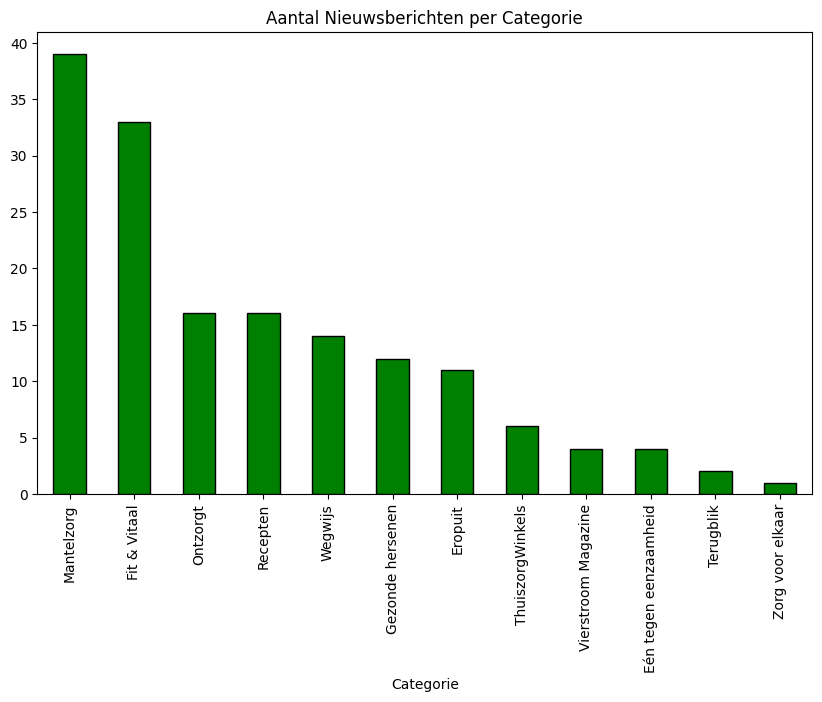

In [54]:
#Plot maken van de verdeling van categorieen
fig, ax = plt.subplots(figsize=(10, 6))
vierstroom['Categorie'].value_counts().plot(kind='bar',edgecolor='black',color = "green",ax=ax)
plt.title('Aantal Nieuwsberichten per Categorie')
plt.show()

<a name='2.0'></a>

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>Scheidingpunt</strong></h2>
</div>

Scrapen van de aanbod pagina van scheidingpunt

https://www.scheidingspunt.nl/

In [55]:
# Load environment variables from .env file
load_dotenv()

# Establish the connection to Azure MySQL
conn = mysql.connector.connect(
    host=db_host,
    user=db_user,
    password=db_password,
    database=db_name,
    ssl_ca=db_ssl_ca  # Ensure this matches the certificate you have
)

# Example: Retrieve data from the 'activiteiten' table
query = "SELECT * FROM activiteiten_scheidingpunt"
scheidingspunt = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Display a sample of the data
scheidingspunt


C:\Users\rogie\AppData\Local\Temp\ipykernel_14524\2820707945.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  scheidingspunt = pd.read_sql(query, conn)


,id,titel,link,wat,voor_wie,wanneer
0,1,Stoere Schildpadden,https://www.scheidingspunt.nl/agenda-jeugd/ite...,Groepstraining.,Kinderen van 4 tot 6 jaar waarvan de ouders ga...,"Voorjaar 2025, start woensdagmiddag 19 maart."
1,2,Dappere Dino’s,https://www.scheidingspunt.nl/agenda-jeugd/ite...,Groepstraining.,Kinderen van 6 tot 8 jaar waarvan de ouders ga...,"Voorjaar 2025, start woensdagmiddag 19 maart."
2,3,KIESgroep voor Primair Onderwijs,https://www.scheidingspunt.nl/agenda-jeugd/ite...,Spel- en lotgenotencontactgroep.,Kinderen van 8 t/m 12 jaar waarvan de ouders g...,Start donderdagmiddag maart 2025.
3,4,KIESgroep Voortgezet Onderwijs,https://www.scheidingspunt.nl/agenda-jeugd/ite...,Doe- en praatgroep voor jongeren.,Kinderen uit klas 1 t/m 3 waarvan de ouders ga...,Start bij voldoende aanmeldingen!
4,5,Villa Pinedo,https://www.scheidingspunt.nl/agenda-jeugd/ite...,Online buddyproject en ondersteuning.,Kinderen 10 – 23 jaar waarvan ouders gaan sche...,"Gehele jaar, naar behoefte."
5,6,Informatiebijeenkomst voor gescheiden ouders,https://www.scheidingspunt.nl/agenda-volwassen...,Informatiebijeenkomsten voor gescheiden ouders,"Voor ouders die voor, tijdens of na de scheidi...",Iedere 3e woensdag in de maand en de week erna
6,7,Online ouderschapscursus Ouders Inc,https://www.scheidingspunt.nl/agenda-volwassen...,Online programma dat (aanstaande) ouders helpt...,Voor zwangeren en ouders met kinderen van 0-4 ...,"In eigen tempo, thuis op de bank wanneer julli..."
7,8,Online ouderbijeenkomst over scheiding,https://www.scheidingspunt.nl/agenda-volwassen...,Een online bijeenkomst over hoe kinderen en sc...,"Voor alle gescheiden ouders, professionals en ...",Vrijdag 13 december 2024.
8,9,Houd me Vast: voor stellen met relatieproblemen,https://www.scheidingspunt.nl/agenda-volwassen...,Groepstraining voor stellen om de relatie te v...,Voor stellen die relatieproblemen ervaren.,Bij aanmelding van min. 4 stellen start HMV z....
9,10,Contactgroep voor Verstoten ouders,https://www.scheidingspunt.nl/agenda-volwassen...,Contactgroep voor verstoten ouders.,"Voor ouders die hun kind(eren) niet meer, of h...",Iedere eerste woensdagavond van de maand met u...


In [57]:
scheidingspunt["link"][1]

'https://www.scheidingspunt.nl/agenda-jeugd/item/10-dappere-dino-s-voorjaar'

In [61]:
#Plot maken van de verdeling voor_wie
# fig, ax = plt.subplots(figsize=(10, 6))
scheidingspunt['voor_wie'].value_counts()
# plt.show()

voor_wie
Kinderen van 4 tot 6 jaar waarvan de ouders gaan scheiden of gescheiden zijn.                                       1
Kinderen van 6 tot 8 jaar waarvan de ouders gaan scheiden of gescheiden zijn.                                       1
Kinderen van 8 t/m 12 jaar waarvan de ouders gaan scheiden of gescheiden zijn.                                      1
Kinderen uit klas 1 t/m 3 waarvan de ouders gaan scheiden of gescheiden zijn.                                       1
Kinderen 10 – 23 jaar waarvan ouders gaan scheiden of gescheiden zijn.                                              1
Voor ouders die voor, tijdens of na de scheiding tegen dingen aanlopen.                                             1
Voor zwangeren en ouders met kinderen van 0-4 jaar.                                                                 1
Voor alle gescheiden ouders, professionals en geïnteresseerden.                                                     1
Voor stellen die relatieproblemen ervaren.     

<a name='2.0'></a>

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>Evie.nl</strong></h2>
</div>



In [63]:
# Load environment variables from .env file
load_dotenv()

# Establish the connection to Azure MySQL
conn = mysql.connector.connect(
    host=db_host,
    user=db_user,
    password=db_password,
    database=db_name,
    ssl_ca=db_ssl_ca  # Ensure this matches the certificate you have
)

# Example: Retrieve data from the 'activiteiten' table
query = "SELECT * FROM evie_data"
evie = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Display a sample of the data
evie


C:\Users\rogie\AppData\Local\Temp\ipykernel_14524\496880561.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  evie = pd.read_sql(query, conn)


,id,Titel,Categorie├½n,Link,Afbeelding_url,Beschrijving,Link_naar_meer_info,Tekst_knop


<a name='2.0'></a>

<div style="background-color:#006096; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>Nederland Zorgt Voor Elkaar</strong></h2>
</div>



In [64]:
# Load environment variables from .env file
load_dotenv()

# Establish the connection to Azure MySQL
conn = mysql.connector.connect(
    host=db_host,
    user=db_user,
    password=db_password,
    database=db_name,
    ssl_ca=db_ssl_ca  # Ensure this matches the certificate you have
)

# Example: Retrieve data from the 'activiteiten' table
query = "SELECT * FROM activiteiten_nlzve"
nlzve = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Display a sample of the data
nlzve


C:\Users\rogie\AppData\Local\Temp\ipykernel_14524\1840033956.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  nlzve = pd.read_sql(query, conn)


,Titel,Locatie,Begintijd,Eindtijd,Beschrijving_kort,Beschrijving_lang,Link,Afbeelding_url
0,Meet up Het Dagelijks Bestaan,Het Dagelijks Bestaan Weg naar Vierakker 47 72...,30-01-2025 om 10:30,30-01-2025 om 15:00,Het Dagelijks Bestaan is een leer- werk- en wo...,Het Dagelijks Bestaan is een leer- werk- en wo...,https://www.nlzve.nl/agenda/2778436.aspx?t=Mee...,https://www.nlzve.nl/media/sectionimages/a3318...
1,Atelier VZC,Online,21-01-2025 om 13:30,21-01-2025 om 15:30,"Heb jij gehoord van voorzorgcirkels, ben je ni...","Heb jij gehoord van voorzorgcirkels, ben je ni...",https://www.nlzve.nl/agenda/2875128.aspx?t=Ate...,https://www.nlzve.nl/media/sectionimages/a3318...
2,Webinar over voorzorgcirkels,Online,18-02-2025 om 12:00,18-02-2025 om 13:00,"Benieuwd wat voorzorgcirkels precies zijn, waa...","Benieuwd wat voorzorgcirkels precies zijn, waa...",https://www.nlzve.nl/agenda/2875129.aspx?t=Web...,https://www.nlzve.nl/media/sectionimages/a3318...
3,Webinar over voorzorgcirkels,Online,17-12-2024 om 12:00,17-12-2024 om 13:00,In dit gratis webinar gaan we gesprek over voo...,In dit gratis webinar gaan we gesprek over voo...,https://www.nlzve.nl/agenda/2875130.aspx?t=Web...,https://www.nlzve.nl/media/sectionimages/a3318...
4,Atelier VZC,,18-03-2025 om 13:30,18-03-2025 om 15:30,Praktijktraining: Hoe start je een voorzorgcir...,Praktijktraining: Hoe start je een voorzorgcir...,https://www.nlzve.nl/agenda/2955210.aspx?t=Ate...,https://www.nlzve.nl/media/sectionimages/a3318...
5,Atelier VZC,Online,13-05-2025 om 13:30,13-05-2025 om 15:30,Praktijktraining: Hoe start je een voorzorgcir...,Praktijktraining: Hoe start je een voorzorgcir...,https://www.nlzve.nl/agenda/2955212.aspx?t=Ate...,https://www.nlzve.nl/media/sectionimages/a3318...
6,Lunchwebinar Voorzorgcirkels,Online,08-04-2025 om 12:00,08-04-2025 om 13:00,"Benieuwd wat voorzorgcirkels precies zijn, waa...","Benieuwd wat voorzorgcirkels precies zijn, waa...",https://www.nlzve.nl/agenda/2955215.aspx?t=Lun...,https://www.nlzve.nl/media/sectionimages/a3318...
7,Lunchwebinar Voorzorgcirkels,Online,10-06-2025 om 12:00,10-06-2025 om 13:00,Maak kennis met voorzorgcirkel-pioniers en lee...,Maak kennis met voorzorgcirkel-pioniers en lee...,https://www.nlzve.nl/agenda/2955216.aspx?t=Lun...,https://www.nlzve.nl/media/sectionimages/a3318...
